In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
import numpy as np

import matplotlib.pyplot as plt


11490434/11490434 [==============================] - 0s 0us/step


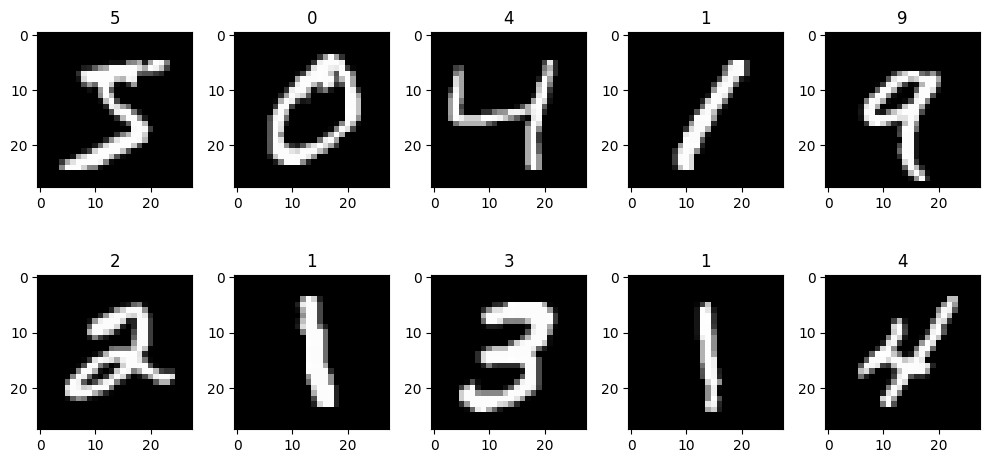

In [3]:
# Data Loading
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()

# Preparing Images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# One-hot encoding (Making the numerical value of each label the same to prevent ai prefering one label to other)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Data visualization (For human verification purposes)
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(str(np.argmax(train_labels[i])))
  plt.axis('on')
plt.tight_layout()
plt.show()


In [ ]:
# Making Neural Network and Training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, PReLU
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, (4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 58s 67ms/step - loss: 0.2689 - accuracy: 0.9141 - val_loss: 0.0591 - val_accuracy: 0.9810
Epoch 2/5
214/844 [======>.......................] - ETA: 42s - loss: 0.0909 - accuracy: 0.9734

In [ ]:
# Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0209 - accuracy: 0.9932
Test Accuracy:  0.9932000041007996


In [ ]:
# Save Model
model.save('digit_model.h5')

In [ ]:
# Upload your own images
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

model = tf.keras.models.load_model('digit_model.h5')

def preprocess_image(image_path):
  img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
  img_array = image.img_to_array(img)
  img_array /= 255
  img_array = np.expand_dims(img_array, axis=0)
  return img_array

def predict_number(model, img_array):
  prediction = model.predict(img_array)
  predicted_number = np.argmax(prediction[0])
  probability = prediction[0][predicted_number]
  return predicted_number, probability

uploaded_image_path = 'number_2.png'
preprocessed_img = preprocess_image(uploaded_image_path)

predicted_number, probability = predict_number(model, preprocessed_img)

print(f"Prediction: {predicted_number}")
print(f"Certainty: {probability}")


1/1 [==============================] - 0s 84ms/step
Prediction: 2
Certainty: 0.9929057359695435
